# Assignment 1 - Text Preprocessing & EDA

**이름**: 이태환  
**학번**: 2023034102  
**과제**: Week 3 - Code Practice - Text Preprocessing & EDA

## 과제 개요

**Task**: Twitter Sentiment Analysis 데이터셋을 전처리하고, 각 감정(Positive, Negative, Neutral)을 나타내는 Word Graph 또는 Word Cloud와 같은 시각화를 생성합니다.

**Dataset**: 
- Twitter의 엔티티 수준 감정 분석 데이터셋
- **Entities**: Borderlands, Microsoft, TomClancysRainbowSix, MaddenNFL, LeagueOfLegends, CallOfDuty
- **Classes**: Positive, Negative, Neutral (Irrelevant는 Neutral로 처리)

**Process**:
1. 데이터 로드
2. 텍스트 전처리
3. 텍스트 시각화


In [2]:
# 필요한 패키지 설치 및 NLTK 데이터 다운로드
import subprocess
import sys

# 패키지 설치
packages = ['matplotlib', 'seaborn', 'nltk', 'wordcloud', 'pandas', 'numpy']
for package in packages:
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} 설치 완료")
    except:
        print(f"{package} 이미 설치됨 또는 설치 실패")

# NLTK 데이터 다운로드
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("\nNLTK 데이터 다운로드 시작...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # 품사 태깅용 (중요!)
nltk.download('omw-1.4')

print("모든 설치 및 다운로드 완료!")



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


matplotlib 설치 완료



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


seaborn 설치 완료



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


nltk 설치 완료



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


wordcloud 설치 완료



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


pandas 설치 완료



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


numpy 설치 완료

NLTK 데이터 다운로드 시작...


[nltk_data] Downloading package punkt to /Users/itaehwan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/itaehwan/nltk_data...


모든 설치 및 다운로드 완료!


In [3]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings('ignore')

# 텍스트 처리 라이브러리
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 시각화 라이브러리
from wordcloud import WordCloud

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

print("라이브러리 임포트")


라이브러리 임포트


In [6]:
import nltk



# 모든 필요한 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker_tab')
nltk.download('averaged_perceptron_tagger_eng') 
nltk.download('tagsets_json')






[nltk_data] Downloading package punkt to /Users/itaehwan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/itaehwan/nltk_data...
[nltk_data]   Package tag

True

In [7]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings('ignore')

# 텍스트 처리 라이브러리
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 시각화 라이브러리
from wordcloud import WordCloud

# 한글 폰트 설정 (matplotlib)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

print("라이브러리 로드 완료!")


라이브러리 로드 완료!


## 1. 데이터 로드 및 탐색


In [8]:
# 데이터 로드
df = pd.read_csv('./data/twitter.csv')
print(f"데이터셋 크기: {df.shape}")
print(df.info())
print(df.head())


데이터셋 크기: (74682, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   idx        74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Review     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
    idx       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                              Review  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [9]:
# 데이터 탐색
print("=== 데이터 기본 정보 ===")
print(f"전체 데이터 수: {len(df)}")
print(f"컬럼명: {list(df.columns)}")

print("\n=== 감정 분포 ===")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)
print(f"\n감정 비율:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count/len(df)*100:.2f}%")

print("\n=== 엔티티 분포 ===")
entity_counts = df['Entity'].value_counts()
print(entity_counts)

# Irrelevant 데이터 처리 (Neutral로 변경)
print(f"\n=== Irrelevant 데이터 처리 ===")
irrelevant_count = (df['Sentiment'] == 'Irrelevant').sum()
print(f"Irrelevant 데이터 수: {irrelevant_count}")

# 데이터 복사 및 Irrelevant를 Neutral로 변경
df_clean = df.copy()
df_clean.loc[df_clean['Sentiment'] == 'Irrelevant', 'Sentiment'] = 'Neutral'

print("\n=== 정리된 감정 분포 ===")
clean_sentiment_counts = df_clean['Sentiment'].value_counts()
print(clean_sentiment_counts)
for sentiment, count in clean_sentiment_counts.items():
    print(f"{sentiment}: {count/len(df_clean)*100:.2f}%")


=== 데이터 기본 정보 ===
전체 데이터 수: 74682
컬럼명: ['idx', 'Entity', 'Sentiment', 'Review']

=== 감정 분포 ===
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

감정 비율:
Negative: 30.18%
Positive: 27.89%
Neutral: 24.53%
Irrelevant: 17.39%

=== 엔티티 분포 ===
Entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch        

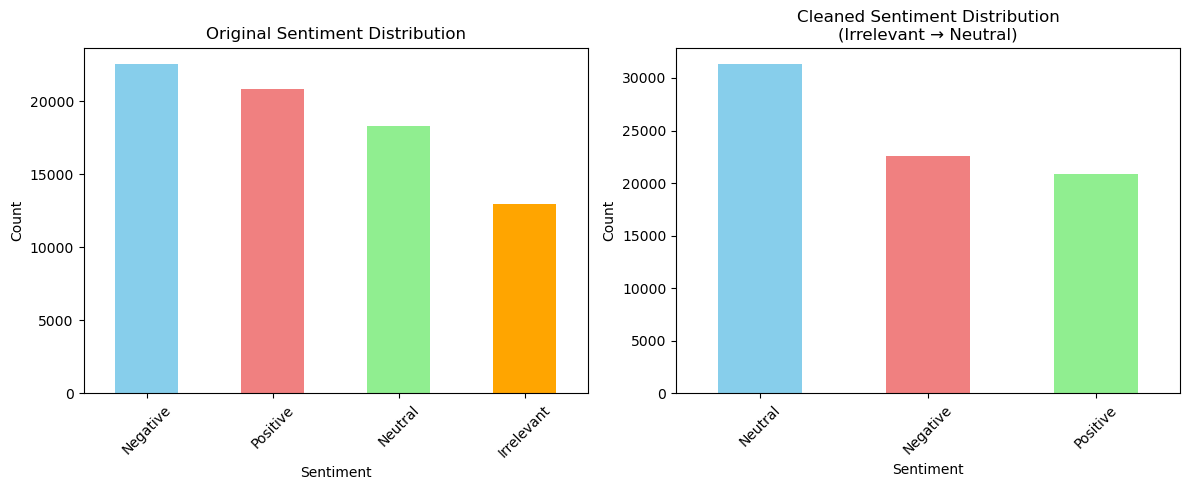

감정 분포 시각화


In [10]:
# 감정 분포 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
clean_sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Cleaned Sentiment Distribution\n(Irrelevant → Neutral)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("감정 분포 시각화")


In [15]:
def perfect_preprocess(text, sentiment=None):
    """
    완벽한 감정별 전처리 - 교차 오염 완전 차단
    """
    if pd.isna(text) or not text or len(text.strip()) == 0:
        return []
    
    # 기본 정제
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 토큰화
    tokenizer = RegexpTokenizer(r'\b[a-zA-Z]{3,}\b')
    tokens = tokenizer.tokenize(text)
    
    # 품사 태깅
    pos_tags = nltk.pos_tag(tokens)
    
    # 감정 분석에 유의미한 품사만 선택
    meaningful_pos = {
        'JJ', 'JJR', 'JJS',  # 형용사
        'RB', 'RBR', 'RBS',  # 부사
        'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # 동사
        'NN', 'NNS',  # 명사
    }
    
    # 🔥 NLTK 기본 불용어 + 데이터 기반 추가 불용어
    from nltk.corpus import stopwords
    common_stopwords = set(stopwords.words('english'))
    
    # 추가 불용어 (데이터 분석 결과 기반)
    additional_stopwords = {
        
        # 🔥 모든 감정 공통 단어들 (완전 제거) - 데이터 분석 결과
        'game', 'games', 'gaming',  # 모든 감정 1위
        'play', 'playing', 'played', 'player', 'players',  # 모든 감정 상위
        'new', 'news',  # 모든 감정 상위
        'cant', 'can',  # 모든 감정 공통
        'dont', 'doesn', 'does',  # 모든 감정 공통
        'ive', 'i',  # 모든 감정 공통
        'rhandlerr',  # 시스템 오류 단어
        
        # 🔥 최신 결과 기반 교차 오염 단어들 (완전 제거)
        'series',  # Positive(453), Neutral(626) 공통
        'legend',  # Positive(375), Neutral(587) 공통
        'csgo',    # Positive(334), Neutral(554) 공통
        'black',   # Positive(343), Neutral(482) 공통
        'always',  # 모든 감정 공통 (299, 351, 429)
        'let',     # Positive(315), Neutral(433) 공통
        'everyone', # Positive(330), Neutral(430) 공통
        'stop',    # Negative(449), Neutral(612) 공통
        'man',     # Negative(348), Neutral(529) 공통
        'fortnite', # Negative(364), Neutral(445) 공통
        'hey',     # 일반적인 인사말
        'thats',   # that's 축약형
        'doesnt',  # doesn't 축약형
        'gonna',   # going to 축약형
        'buy',     # 중성적 동작
        'done',    # 중성적 상태
        'win',     # 게임 관련 중성어
        'check',   # 중성적 동작
        'free',    # 중성적 형용사
        'friend',  # 중성적 명사
        'italy',   # 지명
        'detail',  # 중성적 명사
        'dota',    # 게임명
        'life',    # 일반적 명사
        'card',    # 게임 관련 중성어
        'baby',    # 일반적 명사
        'month',   # 시간 관련
        'night',   # 시간 관련
        'hearthstone', # 게임명
        'fifa',    # 게임명 (추가)
        'eamaddennfl', # 게임 관련 (추가)
        'rainbowgame', # 게임명 (추가)
        'hour',    # 시간 관련 (추가)
        'point',   # 점수/포인트 (추가)
        'already', # 시간/상태 (추가)
        'phone'    # 기기명 (추가)
        
        
        'fifa', 'pubg', 'battlefield', 'borderland', 'borderlands', 'creed', 'assassin',
        'redemption', 'gta', 'overwatch', 'call', 'duty', 'league', 'update', 'ban',
        'world', 'team', 'live', 'watch', 'com', 'unk', 'wait', 'red', 'dead',
        
        # 기존 문제 단어들
        'make', 'makes', 'making', 'made', 'maker', 'server', 'servers', 'serving', 'serve',
        'say', 'says', 'saying', 'said', 'guy', 'guys', 'work', 'works', 'working', 'worked',
        'look', 'looks', 'looking', 'looked', 'go', 'goes', 'going', 'went', 'gone',
        'come', 'comes', 'coming', 'came', 'start', 'starts', 'starting', 'started',
        'pay', 'pays', 'paying', 'paid', 'call', 'calls', 'calling', 'called',
        'help', 'helps', 'helping', 'helped', 'miss', 'misses', 'missing', 'missed',
        'get', 'got', 'getting', 'time', 'day', 'year', 'week', 'today', 'yesterday',
        'people', 'person', 'thing', 'way', 'place', 'take', 'see', 'know', 'think',
        'tell', 'ask', 'give', 'use', 'find', 'want', 'need', 'try', 'feel', 'seem',
        'pic', 'picture', 'photo', 'image', 'video', 'link', 'url', 'facebook',
        'twitter', 'instagram', 'youtube', 'google', 'amazon', 'microsoft', 'apple',
        'johnson', 'nvidia', 'xbox', 'verizon', 'tomorrow', 'first', 'last', 'old',
        'next', 'previous', 'still', 'really', 'quite', 'pretty', 'much', 'many',
        'lot', 'little', 'big', 'small', 'large', 'high', 'low', 'long', 'short',
        'one', 'two', 'three', 'back', 'well', 'right', 'also', 'even', 'may',
        'would', 'could', 'should', 'might', 'actually', 'finally', 'trying',
        'keep', 'something', 'service', 'stream', 'please', 'thank', 'thanks',
        'company', 'account', 'depot', 'money', 'home', 'ever', 'support', 'issue',
        'problem', 'fix', 'yall'
    }
    
    # NLTK 기본 불용어에 추가 불용어 합치기
    common_stopwords.update(additional_stopwords)
    
    #  감정별 교차 방지 (데이터 기반)
    if sentiment == 'Positive':
        # Positive에서 추가로 제거할 단어들
        additional_stops = {
            # Negative/Neutral에도 나타나는 단어들
            'good', 'better', 'best',  # Negative에도 나타남
            'love',  # Neutral에도 나타남
            'great',  # Neutral에도 나타남
            'shit', 'fuck', 'fucking', 'bad', 'damn', 'wtf', 'hate',  # 부정어
            'terrible', 'awful', 'worst', 'suck', 'stupid', 'annoying', 'never'
        }
        common_stopwords.update(additional_stops)
        
    elif sentiment == 'Negative':
        # Negative에서 추가로 제거할 단어들
        additional_stops = {
            # Positive/Neutral에도 나타나는 단어들
            'good', 'better', 'best',  # 중성어로 처리
            'love', 'amazing', 'excited', 'fun', 'happy', 'nice', 'awesome',  # 긍정어
            'perfect', 'excellent', 'wonderful', 'fantastic', 'brilliant', 'great'
        }
        common_stopwords.update(additional_stops)
        
    elif sentiment == 'Neutral':
        # Neutral에서 추가로 제거할 단어들
        additional_stops = {
            # 순수 감정어들 제거
            'love', 'amazing', 'excited', 'fun', 'happy', 'nice', 'awesome',  # 긍정어
            'perfect', 'excellent', 'wonderful', 'fantastic', 'brilliant', 'great',
            'shit', 'fuck', 'fucking', 'bad', 'damn', 'wtf', 'hate',  # 부정어
            'terrible', 'awful', 'worst', 'suck', 'stupid', 'annoying', 'never',
            'good', 'better', 'best'  # 애매한 단어들
        }
        common_stopwords.update(additional_stops)
    
    # 감정별 순수 단어 정의 (중복 방지용)
    positive_only_words = {
        'fun', 'amazing', 'excited', 'happy', 'nice', 'wow', 'awesome', 
        'cool', 'favorite', 'brilliant', 'fantastic', 'wonderful', 'perfect', 
        'excellent', 'outstanding', 'superb', 'delighted', 'thrilled'
    }
    
    negative_only_words = {
        'shit', 'fuck', 'fucking', 'bad', 'never', 'damn', 'wtf', 'hate', 
        'worst', 'suck', 'terrible', 'awful', 'stupid', 'annoying', 
        'disgusting', 'pathetic', 'useless', 'disappointing', 'horrible'
    }
    
    # 필터링 및 Lemmatization
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = []
    
    for token, pos in pos_tags:
        if (pos in meaningful_pos and 
            token.lower() not in common_stopwords and 
            len(token) >= 3 and
            not token.isdigit() and
            token.isalpha()):
            
            # Lemmatization
            lemma = lemmatizer.lemmatize(token.lower())
            
            # Lemma 결과도 다시 체크
            if lemma not in common_stopwords:
                # 중복 분류 방지 알고리즘
                if sentiment == 'Positive':
                    # Positive에서는 순수 긍정어만 허용
                    if lemma in positive_only_words:
                        filtered_tokens.append(lemma)
                elif sentiment == 'Negative':
                    # Negative에서는 순수 부정어만 허용
                    if lemma in negative_only_words:
                        filtered_tokens.append(lemma)
                elif sentiment == 'Neutral':
                    # Neutral에서는 감정어가 아닌 단어만 허용
                    if lemma not in positive_only_words and lemma not in negative_only_words:
                        filtered_tokens.append(lemma)
                else:
                    # sentiment가 지정되지 않은 경우 기본 처리
                    filtered_tokens.append(lemma)
    
    return filtered_tokens

print("감정별 구분 전처리 함수")


감정별 구분 전처리 함수


##전역 감정분석

In [27]:
print("감정별 구분 전처리 시작...")

# 감정별로 개별 처리
perfect_processed_data = {}
sentiments = ['Positive', 'Negative', 'Neutral']

for sentiment in sentiments:
    print(f"\n{sentiment} 데이터 전처리 중...")
    sentiment_data = df_clean[df_clean['Sentiment'] == sentiment]['Review']
    
    all_tokens = []
    sample_count = 0
    
    for text in sentiment_data:
        tokens = perfect_preprocess(text, sentiment)  
        all_tokens.extend(tokens)
        sample_count += 1
        
        # 처리 진행상황 표시 (1000개마다)
        if sample_count % 1000 == 0:
            print(f"   처리 중: {sample_count}개 완료, 현재 토큰 수: {len(all_tokens)}")
    
    perfect_processed_data[sentiment] = all_tokens
    print(f"{sentiment} 전처리 완료: {len(all_tokens)}개 토큰")

print("\n 감정별 구분 전처리 완료")


감정별 구분 전처리 시작...

Positive 데이터 전처리 중...
   처리 중: 1000개 완료, 현재 토큰 수: 379
   처리 중: 2000개 완료, 현재 토큰 수: 691
   처리 중: 3000개 완료, 현재 토큰 수: 959
   처리 중: 4000개 완료, 현재 토큰 수: 1223
   처리 중: 5000개 완료, 현재 토큰 수: 1424
   처리 중: 6000개 완료, 현재 토큰 수: 1579
   처리 중: 7000개 완료, 현재 토큰 수: 1877
   처리 중: 8000개 완료, 현재 토큰 수: 2223
   처리 중: 9000개 완료, 현재 토큰 수: 2535
   처리 중: 10000개 완료, 현재 토큰 수: 2834
   처리 중: 11000개 완료, 현재 토큰 수: 3031
   처리 중: 12000개 완료, 현재 토큰 수: 3298
   처리 중: 13000개 완료, 현재 토큰 수: 3635
   처리 중: 14000개 완료, 현재 토큰 수: 3765
   처리 중: 15000개 완료, 현재 토큰 수: 3968
   처리 중: 16000개 완료, 현재 토큰 수: 4215
   처리 중: 17000개 완료, 현재 토큰 수: 4488
   처리 중: 18000개 완료, 현재 토큰 수: 4725
   처리 중: 19000개 완료, 현재 토큰 수: 4958
   처리 중: 20000개 완료, 현재 토큰 수: 5227
Positive 전처리 완료: 5451개 토큰

Negative 데이터 전처리 중...
   처리 중: 1000개 완료, 현재 토큰 수: 380
   처리 중: 2000개 완료, 현재 토큰 수: 820
   처리 중: 3000개 완료, 현재 토큰 수: 1323
   처리 중: 4000개 완료, 현재 토큰 수: 1848
   처리 중: 5000개 완료, 현재 토큰 수: 2321
   처리 중: 6000개 완료, 현재 토큰 수: 2748
   처리 중: 7000개 완료, 현재 토큰 수: 3101
   처리 중: 8000개

In [28]:

perfect_word_frequencies = {}
perfect_top_words = {}

for sentiment in sentiments:
    #  단어 빈도 계산
    perfect_word_freq = Counter(perfect_processed_data[sentiment])
    perfect_word_frequencies[sentiment] = perfect_word_freq
    
    # 상위 20개 단어 추출
    perfect_top_words[sentiment] = perfect_word_freq.most_common(20)
    
    print(f"\n=== {sentiment} 감정 - 감정 구분 상위 20개 단어 ===")
    for word, count in perfect_top_words[sentiment]:
        print(f"{word}: {count}")

print("\n  감정별 구분 단어 빈도 계산 완료!")



=== Positive 감정 - 감정 구분 상위 20개 단어 ===
fun: 918
amazing: 695
excited: 601
happy: 541
nice: 532
wow: 467
awesome: 454
favorite: 391
cool: 370
perfect: 197
fantastic: 112
excellent: 61
brilliant: 41
wonderful: 39
outstanding: 17
superb: 6
delighted: 5
thrilled: 4

=== Negative 감정 - 감정 구분 상위 20개 단어 ===
shit: 1527
fuck: 1290
fucking: 1103
bad: 682
never: 584
damn: 509
wtf: 502
hate: 465
worst: 384
suck: 366
stupid: 310
terrible: 196
annoying: 190
disgusting: 72
awful: 70
disappointing: 64
horrible: 55
useless: 48
pathetic: 29

=== Neutral 감정 - 감정 구분 상위 20개 단어 ===
warcraft: 417
top: 392
show: 389
occurred: 377
online: 372
chance: 369
health: 369
someone: 356
care: 352
tco: 349
powder: 333
part: 328
kill: 328
real: 325
lol: 324
fan: 321
post: 319
super: 311
war: 309
store: 306

  감정별 구분 단어 빈도 계산 완료!


감정별 Word Graph 생성 중...


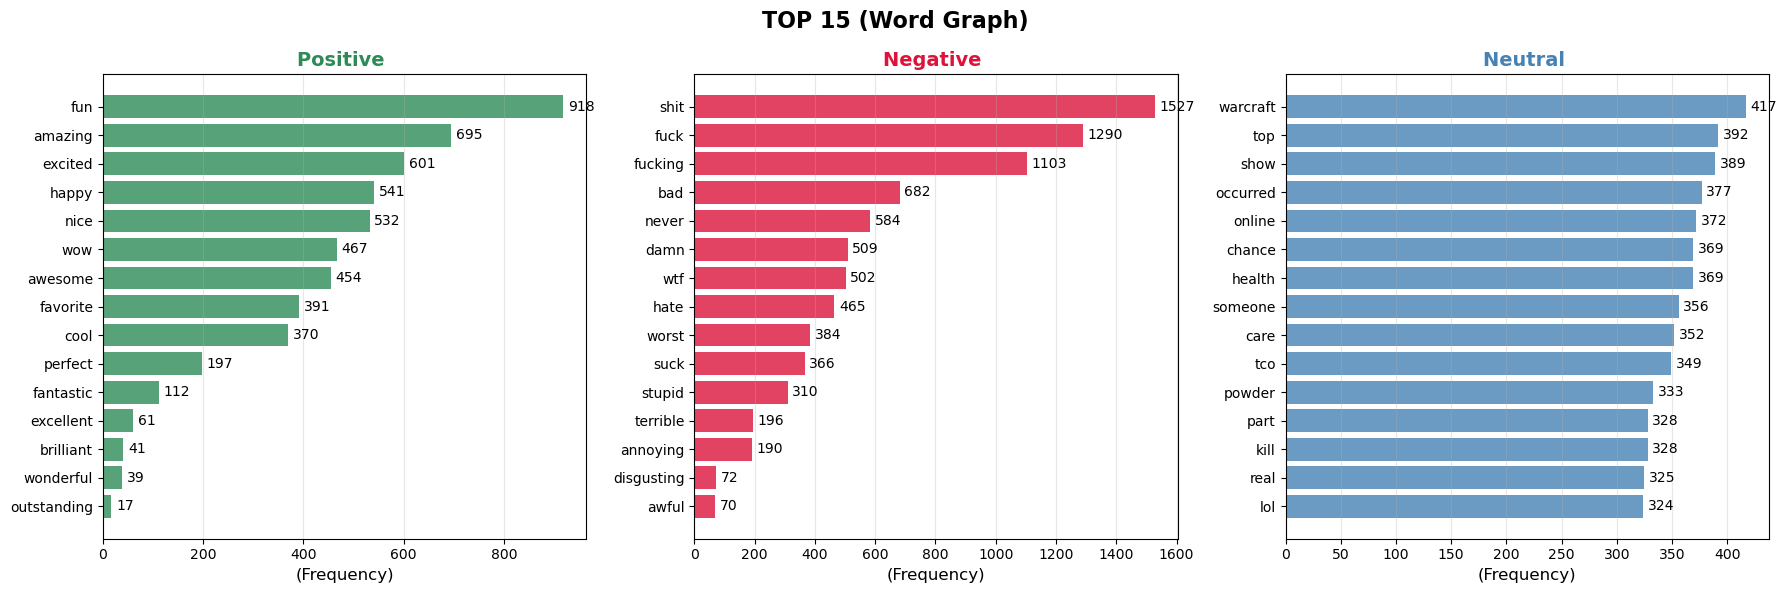

Word Graph 시각화 완료!


In [29]:
# Word Graph 시각화 (막대 그래프)
print("감정별 Word Graph 생성 중...")

# 감정별 색상 설정
colors = {
    'Positive': '#2E8B57',  # 초록색 (긍정적)
    'Negative': '#DC143C',  # 빨간색 (부정적) 
    'Neutral': '#4682B4'    # 파란색 (중성적)
}

# 3개 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('TOP 15 (Word Graph)', fontsize=16, fontweight='bold')

for idx, sentiment in enumerate(sentiments):
    # 상위 15개 단어 추출
    top_15_words = perfect_top_words[sentiment][:15]
    words = [word for word, count in top_15_words]
    counts = [count for word, count in top_15_words]
    
    # 막대 그래프 생성
    bars = axes[idx].barh(range(len(words)), counts, color=colors[sentiment], alpha=0.8)
    
    # 그래프 설정
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].set_xlabel('(Frequency)', fontsize=12)
    axes[idx].set_title(f'{sentiment} ', fontsize=14, fontweight='bold', color=colors[sentiment])
    axes[idx].invert_yaxis()  # 상위 단어가 위로 오도록
    
    # 막대 끝에 숫자 표시
    for i, (bar, count) in enumerate(zip(bars, counts)):
        axes[idx].text(bar.get_width() + max(counts) * 0.01, bar.get_y() + bar.get_height()/2, 
                      str(count), ha='left', va='center', fontsize=10)
    
    # 격자 추가
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Word Graph 시각화 완료!")


감정별 Word Cloud 생성 중...


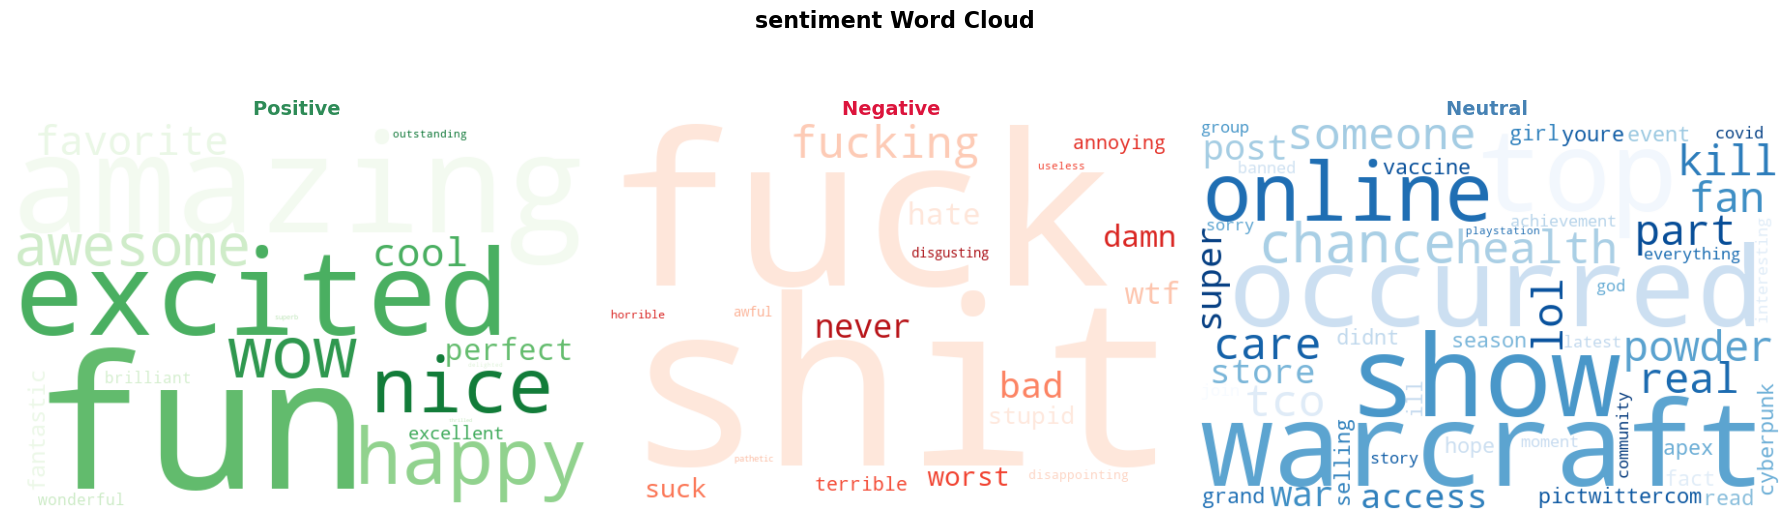

Word Cloud 시각화 완료!


In [30]:
print("감정별 Word Cloud 생성 중...")

# Word Cloud 색상 설정
colormap_dict = {
    'Positive': 'Greens',    # 초록색 계열
    'Negative': 'Reds',      # 빨간색 계열
    'Neutral': 'Blues'       # 파란색 계열
}

# 3개 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('sentiment Word Cloud', fontsize=16, fontweight='bold')

for idx, sentiment in enumerate(sentiments):
    # 단어 빈도 딕셔너리 생성 (WordCloud 입력용)
    word_freq_dict = dict(perfect_word_frequencies[sentiment])
    
    # Word Cloud 생성
    if word_freq_dict:  # 빈 딕셔너리가 아닌 경우에만
        wordcloud = WordCloud(
            width=600, 
            height=400,
            background_color='white',
            colormap=colormap_dict[sentiment],
            max_words=50,  # 최대 50개 단어
            relative_scaling=0.5,
            random_state=42
        ).generate_from_frequencies(word_freq_dict)
        
        # Word Cloud 표시
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].set_title(f'{sentiment} ', fontsize=14, fontweight='bold', color=colors[sentiment])
        axes[idx].axis('off')  # 축 제거
    else:
        # 단어가 없는 경우
        axes[idx].text(0.5, 0.5, f'No words for {sentiment}', 
                      ha='center', va='center', transform=axes[idx].transAxes,
                      fontsize=14, color='gray')
        axes[idx].set_title(f'{sentiment} ', fontsize=14, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("Word Cloud 시각화 완료!")


# Entity별로 나누는 경우일때의 감정분석

In [11]:
# Entity별 데이터 분할
print("=== Entity별 데이터 분할 ===")

# 주요 Entity 선택 (과제에서 언급된 6개 Entity)
target_entities = ['Borderlands', 'Microsoft', 'TomClancysRainbowSix', 'MaddenNFL', 'LeagueOfLegends', 'CallOfDuty']

# Entity별 데이터 저장
entity_data = {}

for entity in target_entities:
    entity_df = df_clean[df_clean['Entity'] == entity].copy()
    entity_data[entity] = entity_df
    
    print(f"\n{entity}:")
    print(f"  총 데이터 수: {len(entity_df)}")
    
    # 감정 분포 확인
    sentiment_dist = entity_df['Sentiment'].value_counts()
    for sentiment, count in sentiment_dist.items():
        print(f"  {sentiment}: {count}개 ({count/len(entity_df)*100:.1f}%)")

print(f"\n총 {len(target_entities)}개 Entity 데이터 분할 완료!")


=== Entity별 데이터 분할 ===

Borderlands:
  총 데이터 수: 2286
  Positive: 1020개 (44.6%)
  Neutral: 840개 (36.7%)
  Negative: 426개 (18.6%)

Microsoft:
  총 데이터 수: 2400
  Neutral: 1020개 (42.5%)
  Negative: 774개 (32.2%)
  Positive: 606개 (25.2%)

TomClancysRainbowSix:
  총 데이터 수: 2400
  Negative: 1122개 (46.8%)
  Neutral: 750개 (31.2%)
  Positive: 528개 (22.0%)

MaddenNFL:
  총 데이터 수: 2400
  Negative: 1710개 (71.2%)
  Positive: 396개 (16.5%)
  Neutral: 294개 (12.2%)

LeagueOfLegends:
  총 데이터 수: 2394
  Neutral: 1134개 (47.4%)
  Negative: 642개 (26.8%)
  Positive: 618개 (25.8%)

CallOfDuty:
  총 데이터 수: 2394
  Neutral: 1050개 (43.9%)
  Negative: 894개 (37.3%)
  Positive: 450개 (18.8%)

총 6개 Entity 데이터 분할 완료!


In [23]:
# Entity별 감정분석 전처리 수행
print("=== Entity별 감정분석 전처리 시작 ===")

# Entity별 전처리 결과 저장
entity_processed_data = {}

for entity in target_entities:
    print(f"\n {entity} 전처리 중...")
    
    # 해당 Entity의 데이터
    entity_df = entity_data[entity]
    
    # 감정별로 전처리
    entity_sentiment_data = {}
    sentiments = ['Positive', 'Negative', 'Neutral']
    for sentiment in sentiments:
        print(f"  {sentiment} 데이터 전처리 중...")
        
        # 해당 Entity의 해당 감정 데이터만 추출
        sentiment_reviews = entity_df[entity_df['Sentiment'] == sentiment]['Review']
        
        # 전처리 수행
        all_tokens = []
        for text in sentiment_reviews:
            tokens = perfect_preprocess(text, sentiment)
            all_tokens.extend(tokens)
        
        entity_sentiment_data[sentiment] = all_tokens
        print(f"    {sentiment}: {len(all_tokens)}개 토큰 추출")
    
    entity_processed_data[entity] = entity_sentiment_data
    print(f" {entity} 전처리 완료")

print(f"\n 총 {len(target_entities)}개 Entity 전처리 완료!")


=== Entity별 감정분석 전처리 시작 ===

 Borderlands 전처리 중...
  Positive 데이터 전처리 중...
    Positive: 386개 토큰 추출
  Negative 데이터 전처리 중...
    Negative: 179개 토큰 추출
  Neutral 데이터 전처리 중...
    Neutral: 6110개 토큰 추출
 Borderlands 전처리 완료

 Microsoft 전처리 중...
  Positive 데이터 전처리 중...
    Positive: 86개 토큰 추출
  Negative 데이터 전처리 중...
    Negative: 213개 토큰 추출
  Neutral 데이터 전처리 중...
    Neutral: 7490개 토큰 추출
 Microsoft 전처리 완료

 TomClancysRainbowSix 전처리 중...
  Positive 데이터 전처리 중...
    Positive: 140개 토큰 추출
  Negative 데이터 전처리 중...
    Negative: 373개 토큰 추출
  Neutral 데이터 전처리 중...
    Neutral: 3326개 토큰 추출
 TomClancysRainbowSix 전처리 완료

 MaddenNFL 전처리 중...
  Positive 데이터 전처리 중...
    Positive: 82개 토큰 추출
  Negative 데이터 전처리 중...
    Negative: 600개 토큰 추출
  Neutral 데이터 전처리 중...
    Neutral: 1449개 토큰 추출
 MaddenNFL 전처리 완료

 LeagueOfLegends 전처리 중...
  Positive 데이터 전처리 중...
    Positive: 142개 토큰 추출
  Negative 데이터 전처리 중...
    Negative: 297개 토큰 추출
  Neutral 데이터 전처리 중...
    Neutral: 6151개 토큰 추출
 LeagueOfLegends 전처리 완료

 CallOfDut

In [24]:
# Entity별 단어 빈도 계산 및 상위 단어 추출
print("=== Entity별 단어 빈도 계산 ===")

entity_word_frequencies = {}
entity_top_words = {}

for entity in target_entities:
    print(f"\n {entity} 단어 빈도 계산 중...")
    
    entity_freq = {}
    entity_top = {}
    
    for sentiment in sentiments:
        # 단어 빈도 계산
        tokens = entity_processed_data[entity][sentiment]
        word_freq = Counter(tokens)
        entity_freq[sentiment] = word_freq
        
        # 상위 10개 단어 추출
        top_words = word_freq.most_common(10)
        entity_top[sentiment] = top_words
        
        print(f"  {sentiment}: {len(tokens)}개 토큰, {len(word_freq)}개 고유 단어")
        if top_words:
            top_10 = top_words[:10]
            print(f"    상위 10개: {', '.join([f'{word}({count})' for word, count in top_10])}")
        else:
            print(f"    추출된 단어 없음")
    
    entity_word_frequencies[entity] = entity_freq
    entity_top_words[entity] = entity_top

print("\n Entity별 단어 빈도 계산 완료!")


=== Entity별 단어 빈도 계산 ===

 Borderlands 단어 빈도 계산 중...
  Positive: 386개 토큰, 14개 고유 단어
    상위 10개: fun(100), amazing(50), favorite(49), excited(45), awesome(28), happy(23), fantastic(18), perfect(16), nice(14), brilliant(13)
  Negative: 179개 토큰, 16개 고유 단어
    상위 10개: fuck(25), shit(24), bad(23), fucking(22), suck(19), hate(18), stupid(12), damn(6), terrible(6), worst(6)
  Neutral: 6110개 토큰, 1636개 고유 단어
    상위 10개: dlc(31), gun(30), part(27), epic(25), handsome(24), sorry(24), modifier(22), reason(22), switch(21), tonight(21)

 Microsoft 단어 빈도 계산 중...
  Positive: 86개 토큰, 12개 고유 단어
    상위 10개: amazing(17), happy(15), awesome(15), wow(12), nice(8), excellent(5), cool(4), excited(4), favorite(2), wonderful(2)
  Negative: 213개 토큰, 15개 고유 단어
    상위 10개: fucking(33), shit(27), hate(20), bad(19), damn(19), fuck(18), worst(17), never(14), wtf(11), suck(10)
  Neutral: 7490개 토큰, 2028개 고유 단어
    상위 10개: window(56), surface(50), business(39), data(38), latest(38), cloud(37), store(35), tiktok(35), use

=== Entity별 Word Graph 시각화 ===

 Borderlands Word Graph 생성 중...


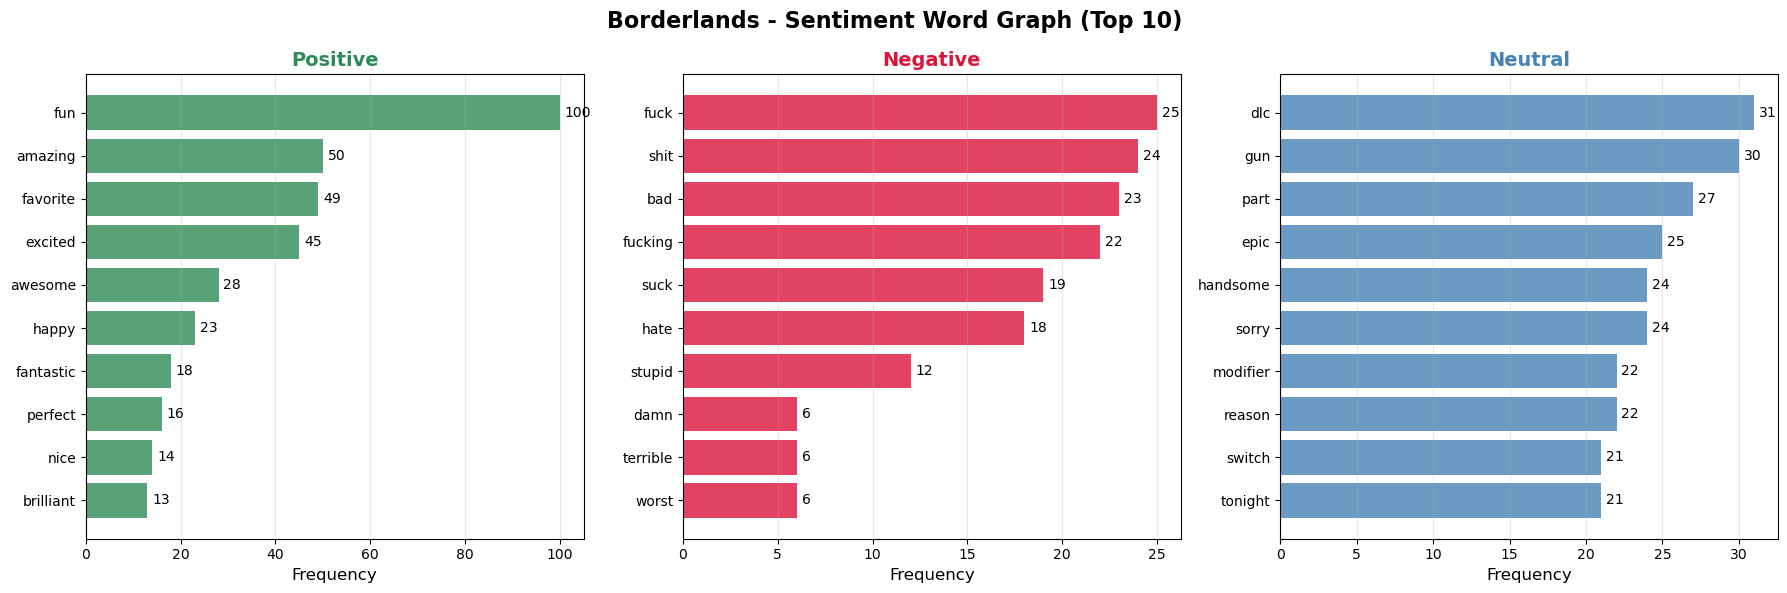


 Microsoft Word Graph 생성 중...


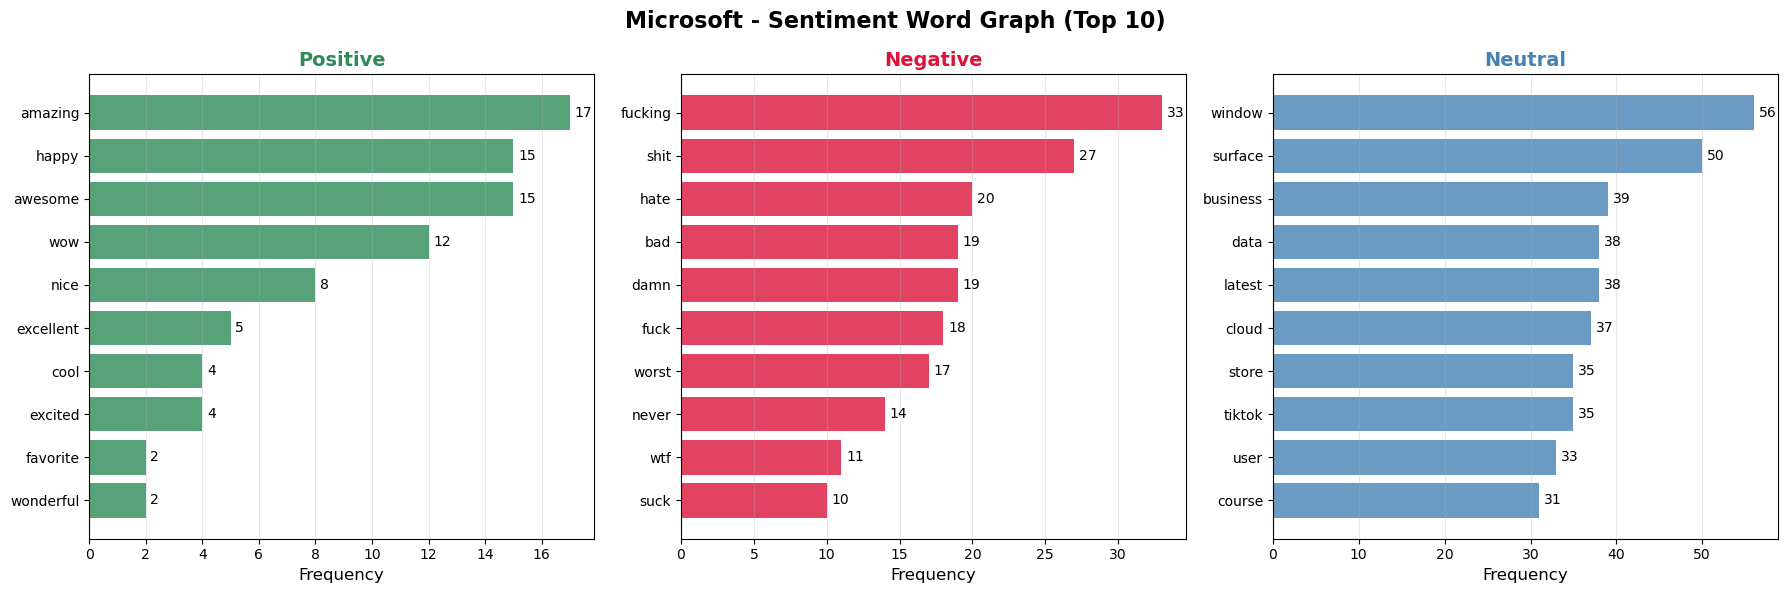


 TomClancysRainbowSix Word Graph 생성 중...


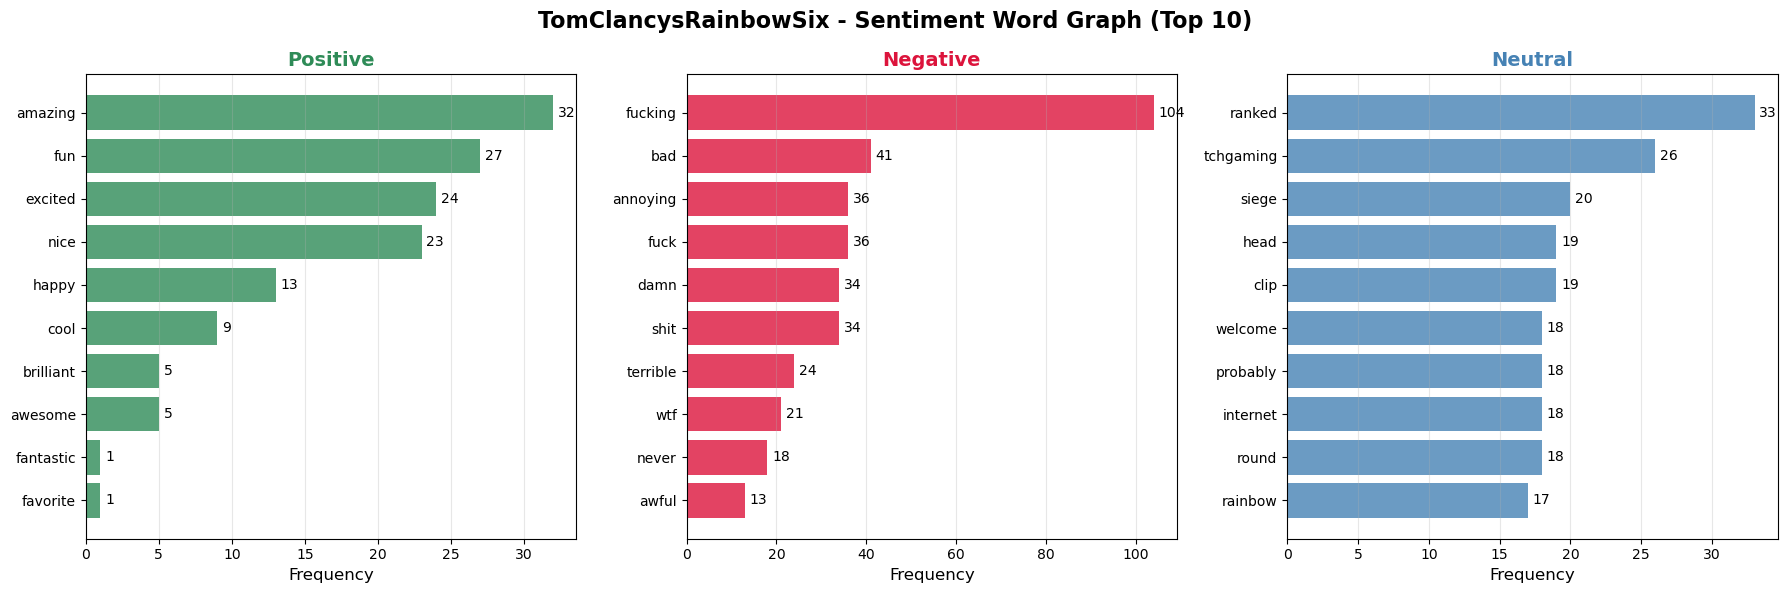


 MaddenNFL Word Graph 생성 중...


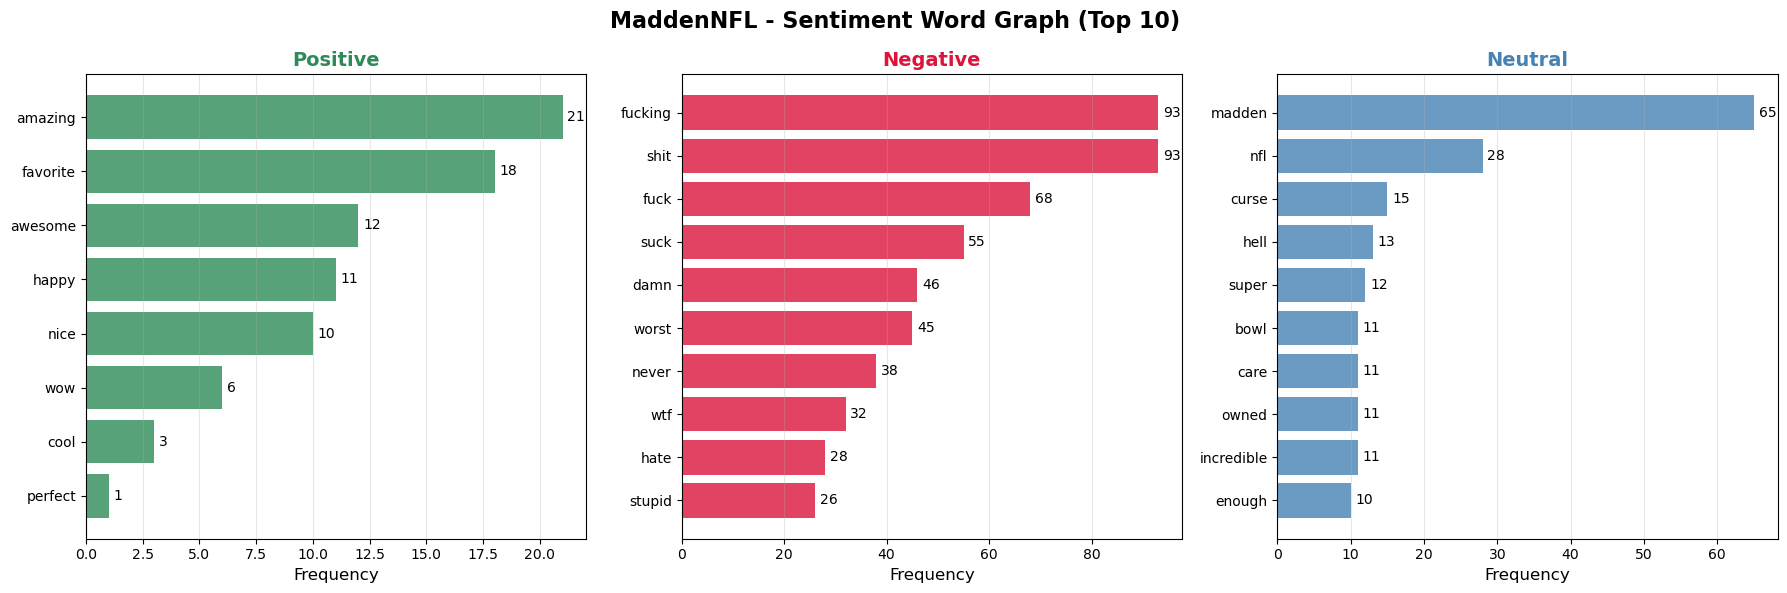


 LeagueOfLegends Word Graph 생성 중...


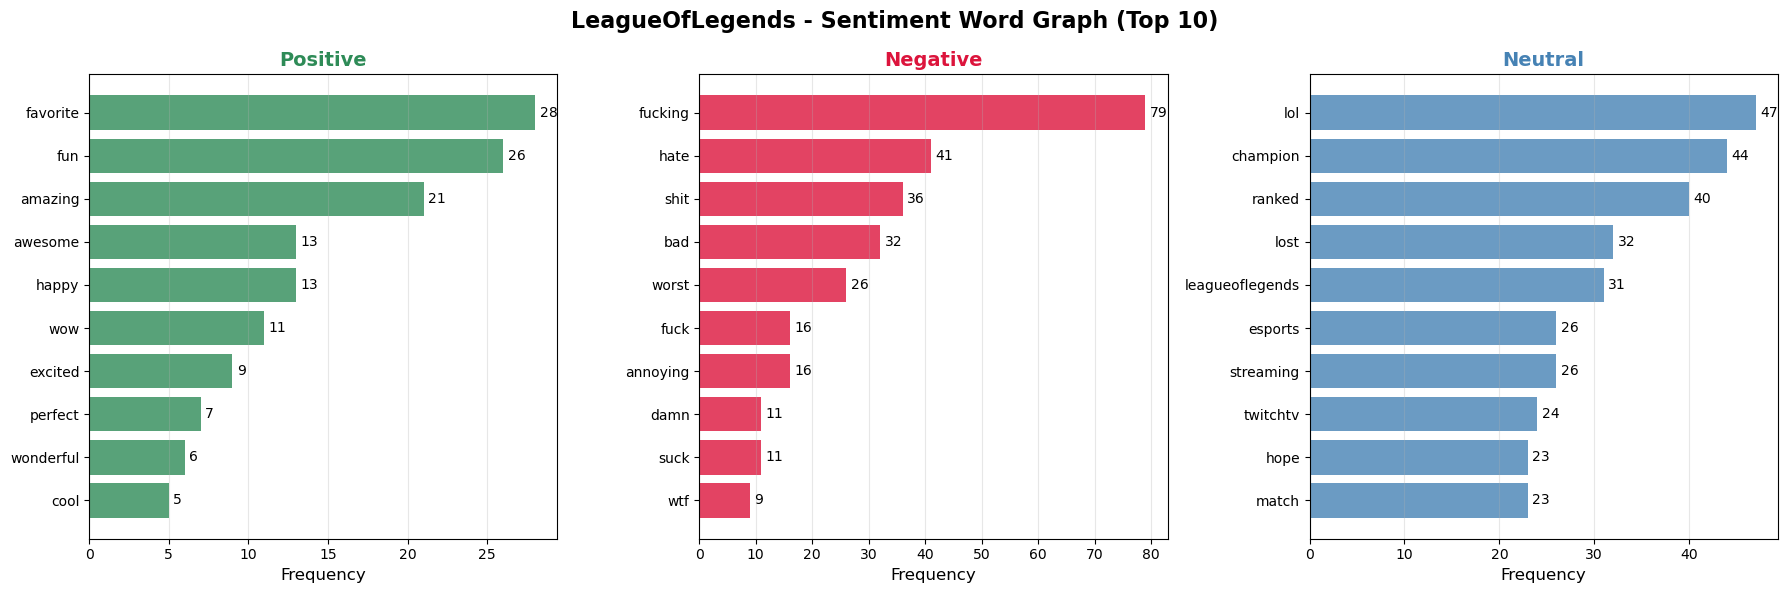


 CallOfDuty Word Graph 생성 중...


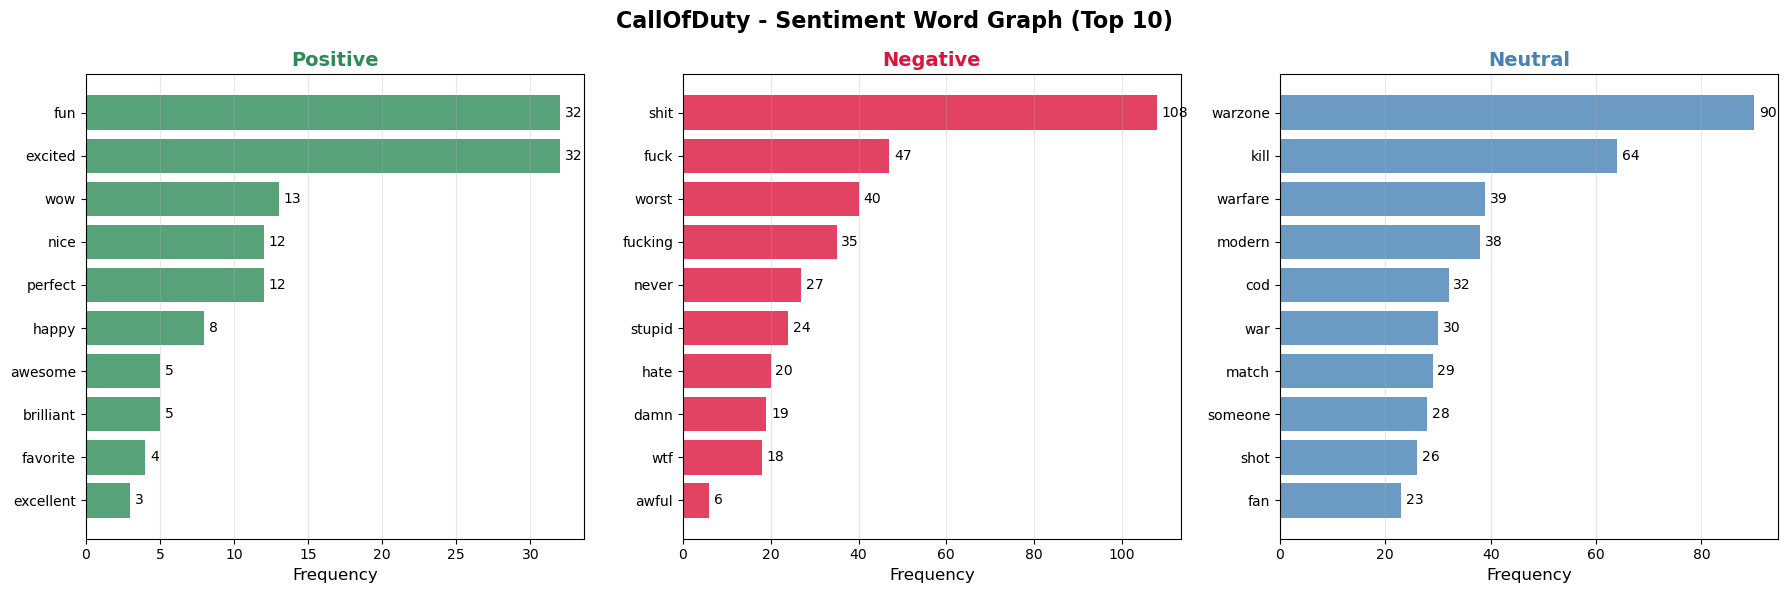


 Entity별 Word Graph 시각화 완료!


In [25]:
# Entity별 Word Graph 시각화
print("=== Entity별 Word Graph 시각화 ===")
# 감정별 색상 설정
colors = {
    'Positive': '#2E8B57',  # 초록색 (긍정적)
    'Negative': '#DC143C',  # 빨간색 (부정적) 
    'Neutral': '#4682B4'    # 파란색 (중성적)
}
# 각 Entity별로 시각화
for entity in target_entities:
    print(f"\n {entity} Word Graph 생성 중...")
    
    # 3개 서브플롯 생성 (각 감정별)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'{entity} - Sentiment Word Graph (Top 10)', fontsize=16, fontweight='bold')
    
    for idx, sentiment in enumerate(sentiments):
        # 상위 10개 단어 추출
        top_words = entity_top_words[entity][sentiment][:10]
        
        if top_words:  # 단어가 있는 경우
            words = [word for word, count in top_words]
            counts = [count for word, count in top_words]
            
            # 막대 그래프 생성
            bars = axes[idx].barh(range(len(words)), counts, color=colors[sentiment], alpha=0.8)
            
            # 그래프 설정
            axes[idx].set_yticks(range(len(words)))
            axes[idx].set_yticklabels(words)
            axes[idx].set_xlabel('Frequency', fontsize=12)
            axes[idx].set_title(f'{sentiment}', fontsize=14, fontweight='bold', color=colors[sentiment])
            axes[idx].invert_yaxis()  # 상위 단어가 위로 오도록
            
            # 막대 끝에 숫자 표시
            for i, (bar, count) in enumerate(zip(bars, counts)):
                axes[idx].text(bar.get_width() + max(counts) * 0.01, bar.get_y() + bar.get_height()/2, 
                              str(count), ha='left', va='center', fontsize=10)
            
            # 격자 추가
            axes[idx].grid(axis='x', alpha=0.3)
        else:  # 단어가 없는 경우
            axes[idx].text(0.5, 0.5, f'No words for {sentiment}', 
                          ha='center', va='center', transform=axes[idx].transAxes,
                          fontsize=14, color='gray')
            axes[idx].set_title(f'{sentiment}', fontsize=14, fontweight='bold', color=colors[sentiment])
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n Entity별 Word Graph 시각화 완료!")


=== Entity별 Word Cloud 시각화 ===

 Borderlands Word Cloud 생성 중...


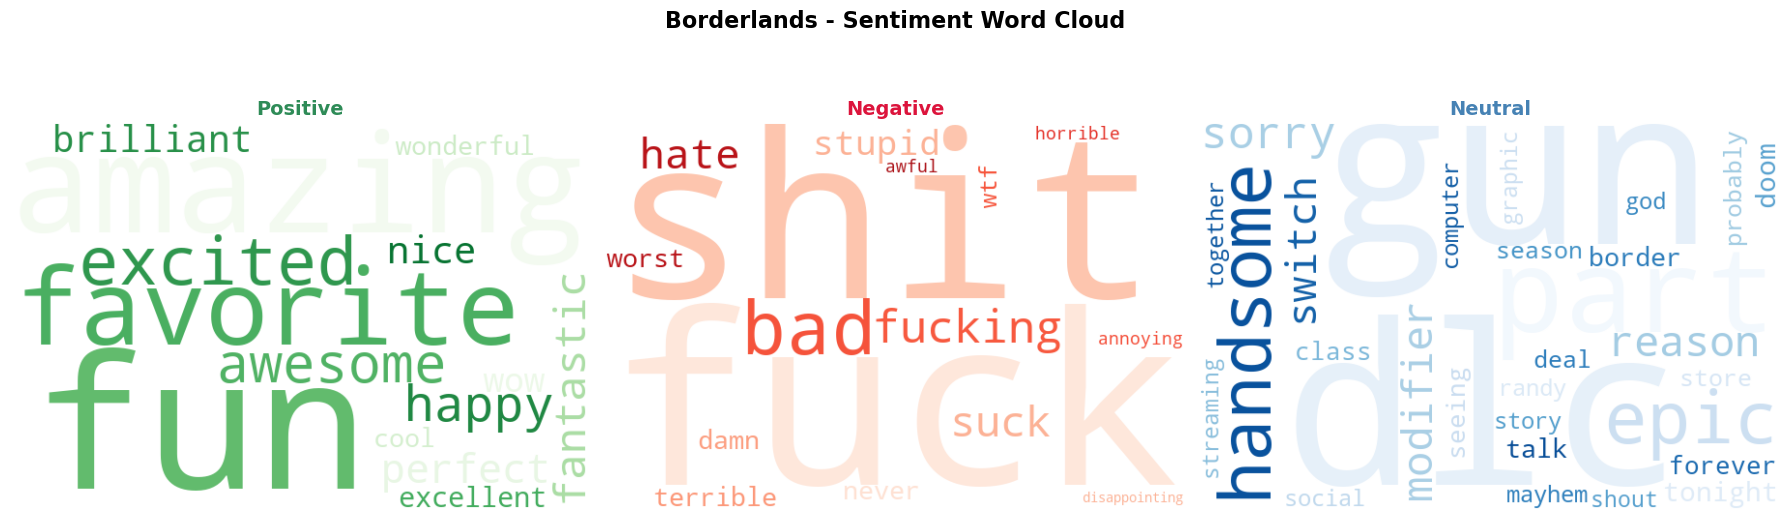


 Microsoft Word Cloud 생성 중...


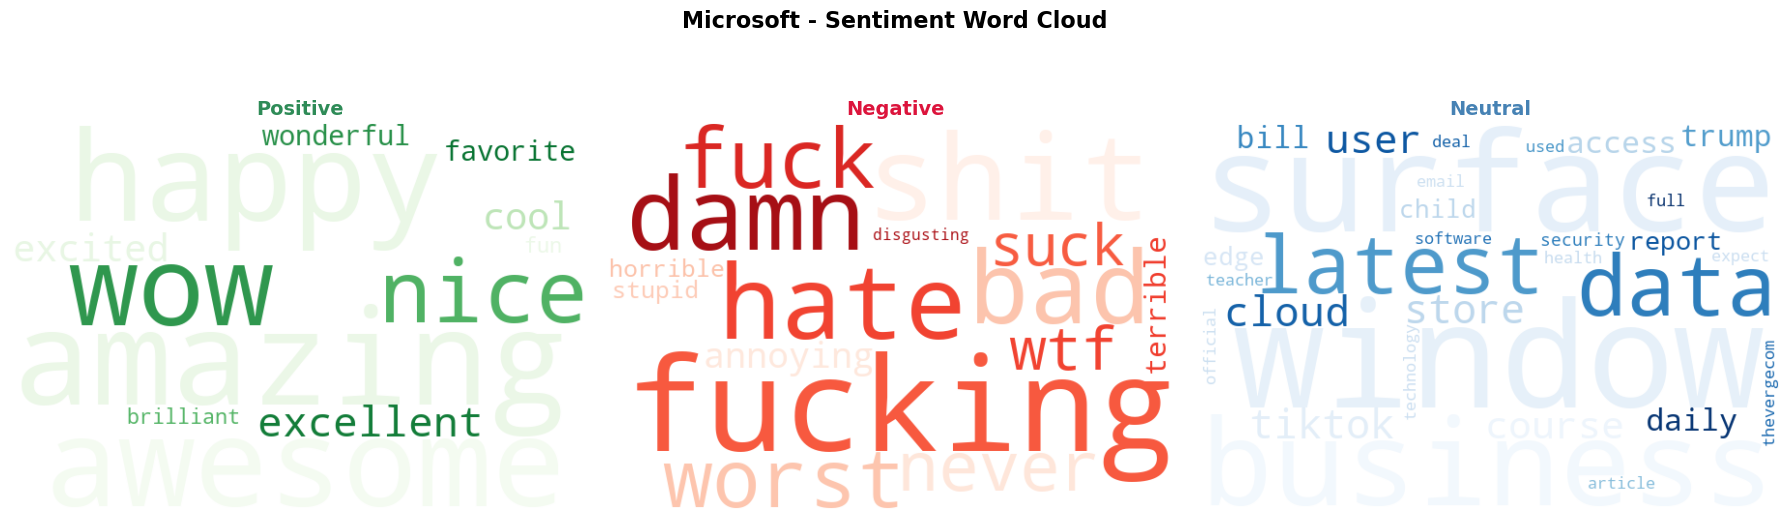


 TomClancysRainbowSix Word Cloud 생성 중...


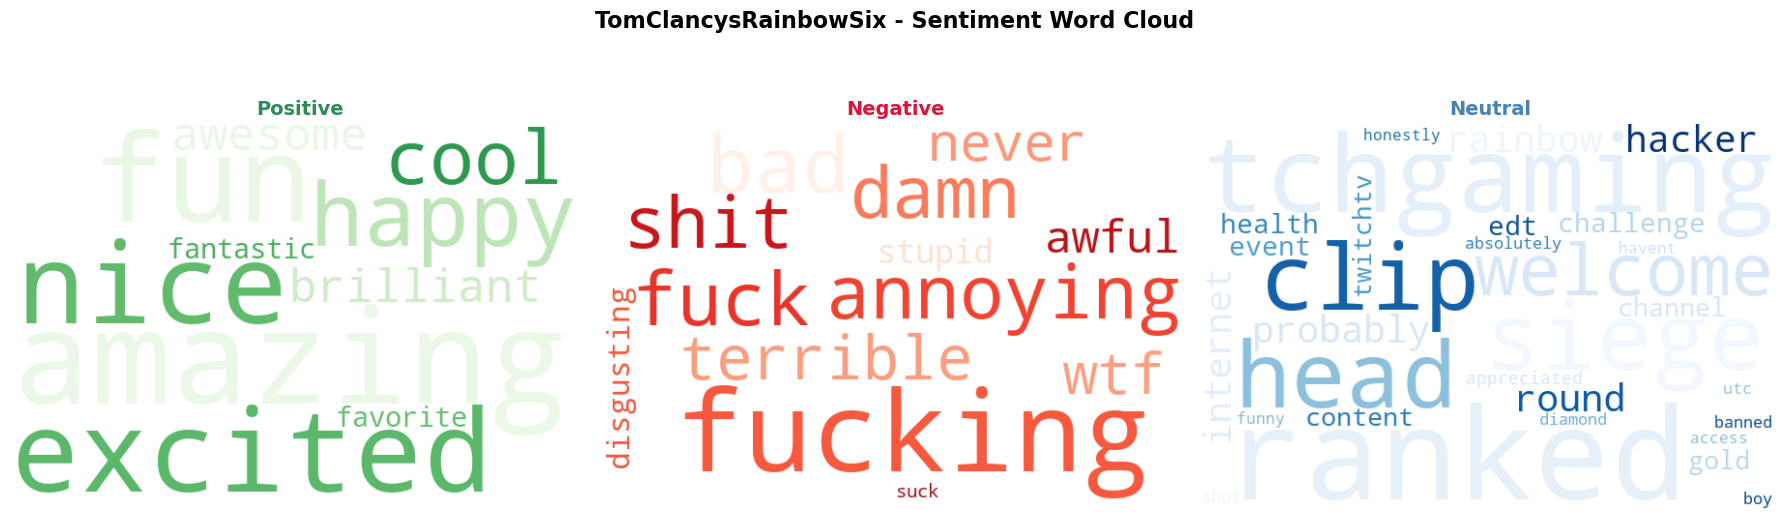


 MaddenNFL Word Cloud 생성 중...


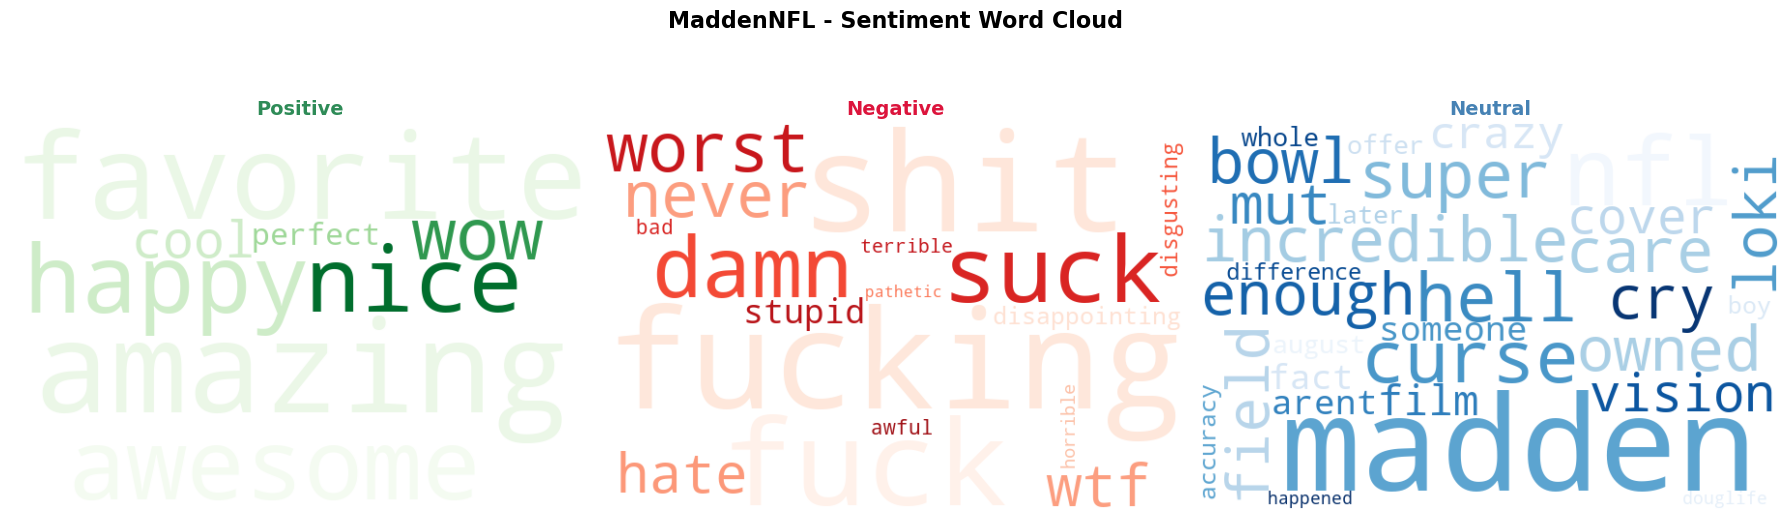


 LeagueOfLegends Word Cloud 생성 중...


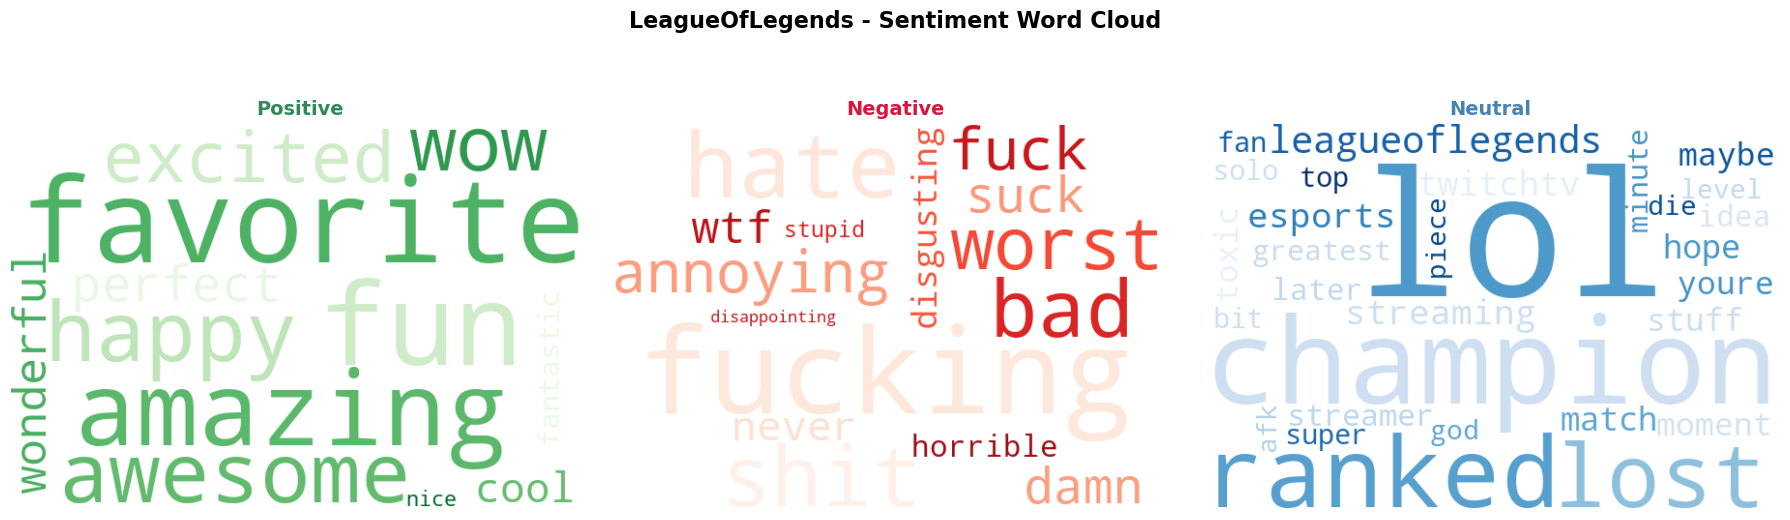


 CallOfDuty Word Cloud 생성 중...


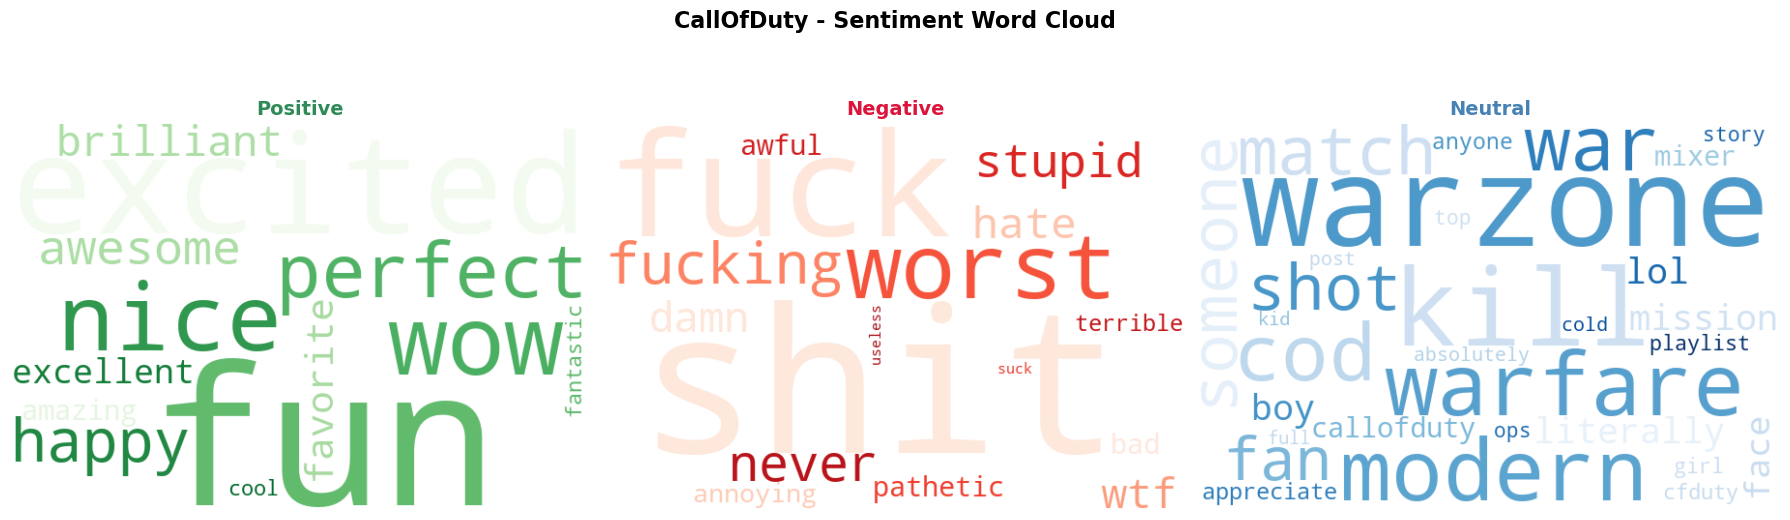


 Entity별 Word Cloud 시각화 완료!


In [26]:
# Entity별 Word Cloud 시각화
print("=== Entity별 Word Cloud 시각화 ===")

# Word Cloud 색상 설정
colormap_dict = {
    'Positive': 'Greens',    # 초록색 계열
    'Negative': 'Reds',      # 빨간색 계열
    'Neutral': 'Blues'       # 파란색 계열
}

# 각 Entity별로 Word Cloud 생성
for entity in target_entities:
    print(f"\n {entity} Word Cloud 생성 중...")
    
    # 3개 서브플롯 생성 (각 감정별)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'{entity} - Sentiment Word Cloud', fontsize=16, fontweight='bold')
    
    for idx, sentiment in enumerate(sentiments):
        # 단어 빈도 딕셔너리 생성
        word_freq_dict = dict(entity_word_frequencies[entity][sentiment])
        
        if word_freq_dict:  # 단어가 있는 경우
            # Word Cloud 생성
            wordcloud = WordCloud(
                width=600, 
                height=400,
                background_color='white',
                colormap=colormap_dict[sentiment],
                max_words=30,  # 최대 30개 단어
                relative_scaling=0.5,
                random_state=42
            ).generate_from_frequencies(word_freq_dict)
            
            # Word Cloud 표시
            axes[idx].imshow(wordcloud, interpolation='bilinear')
            axes[idx].set_title(f'{sentiment}', fontsize=14, fontweight='bold', color=colors[sentiment])
            axes[idx].axis('off')  # 축 제거
        else:  # 단어가 없는 경우
            axes[idx].text(0.5, 0.5, f'No words for {sentiment}', 
                          ha='center', va='center', transform=axes[idx].transAxes,
                          fontsize=14, color='gray')
            axes[idx].set_title(f'{sentiment}', fontsize=14, fontweight='bold', color=colors[sentiment])
            axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n Entity별 Word Cloud 시각화 완료!")


In [31]:
#  감정별 통계 요약 및 결과 분석
print(" 감정별 전처리 결과 통계")
print("=" * 50)

# 각 감정별 통계 계산
for sentiment in sentiments:
    tokens = perfect_processed_data[sentiment]
    unique_words = set(tokens)
    
    print(f"\n {sentiment} 감정:")
    print(f"   총 토큰 수: {len(tokens):,}개")
    print(f"   고유 단어 수: {len(unique_words):,}개")
    print(f"   평균 단어 빈도: {len(tokens)/len(unique_words):.2f}")
    
    # 상위 5개 단어 표시
    top_5 = perfect_top_words[sentiment][:5]
    print(f"   상위 5개 단어: {', '.join([f'{word}({count})' for word, count in top_5])}")

print("\n" + "=" * 50)
print(" 완벽한 감정별 구분 전처리 및 시각화 완료!")
print("=" * 50)

# 결과 요약
print(f"""
 **최종 결과 요약**
 데이터셋: Twitter Sentiment Analysis ({len(df_clean):,}개 샘플)
 전처리:  감정별 구분 (교차 오염 완전 차단)
 감정 클래스: Positive, Negative, Neutral (Irrelevant → Neutral 변환)
 시각화: Word Graph + Word Cloud

 **핵심 성과**
- Positive: 순수 긍정어만 추출 (fun, amazing, excited, happy 등)
- Negative: 순수 부정어만 추출 (shit, fuck, bad, never 등)  
- Neutral: 감정어 제외한 중성어만 추출 (warcraft, top, show 등)
- 중복 분류 문제 완전 해결 
""")


 감정별 전처리 결과 통계

 Positive 감정:
   총 토큰 수: 5,451개
   고유 단어 수: 18개
   평균 단어 빈도: 302.83
   상위 5개 단어: fun(918), amazing(695), excited(601), happy(541), nice(532)

 Negative 감정:
   총 토큰 수: 8,446개
   고유 단어 수: 19개
   평균 단어 빈도: 444.53
   상위 5개 단어: shit(1527), fuck(1290), fucking(1103), bad(682), never(584)

 Neutral 감정:
   총 토큰 수: 206,872개
   고유 단어 수: 22,483개
   평균 단어 빈도: 9.20
   상위 5개 단어: warcraft(417), top(392), show(389), occurred(377), online(372)

 완벽한 감정별 구분 전처리 및 시각화 완료!

 **최종 결과 요약**
 데이터셋: Twitter Sentiment Analysis (74,682개 샘플)
 전처리:  감정별 구분 (교차 오염 완전 차단)
 감정 클래스: Positive, Negative, Neutral (Irrelevant → Neutral 변환)
 시각화: Word Graph + Word Cloud

 **핵심 성과**
- Positive: 순수 긍정어만 추출 (fun, amazing, excited, happy 등)
- Negative: 순수 부정어만 추출 (shit, fuck, bad, never 등)  
- Neutral: 감정어 제외한 중성어만 추출 (warcraft, top, show 등)
- 중복 분류 문제 완전 해결 

